# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [4]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [5]:
data.shape

(5391, 6)

In [6]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

In [7]:
data.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

In [9]:
data.nunique()

Rank                     5391
Release_Date             2262
Movie_Title              5318
USD_Production_Budget     484
USD_Worldwide_Gross      4969
USD_Domestic_Gross       4809
dtype: int64

In [10]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [19]:
data.isna().value_counts()

Rank   Release_Date  Movie_Title  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
False  False         False        False                  False                False                 5391
Name: count, dtype: int64

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [18]:
print (f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data')
print (f'There are {data.isna().sum()} NAN values in the data')

There are 5391 rows and 6 columns in the data
There are Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64 NAN values in the data


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [20]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [31]:
data.USD_Production_Budget = data.USD_Production_Budget.str.replace('$','')
data.USD_Production_Budget = data.USD_Production_Budget.str.replace(',', '')
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace('$','')
data.USD_Worldwide_Gross = data.USD_Worldwide_Gross.str.replace(',', '')
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace('$', '')
data.USD_Domestic_Gross = data.USD_Domestic_Gross.str.replace(',', '')
data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
data.USD_Worldwide_Gross = pd.to_numeric(data.USD_Worldwide_Gross)
data.USD_Domestic_Gross = pd.to_numeric(data.USD_Domestic_Gross)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [33]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [38]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [39]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [84]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [50]:
print(f'The average production budget is {data.USD_Production_Budget.mean()}')
print(f'The average worldwide gross is {data.USD_Worldwide_Gross.mean()}')
print(f'The minimums for worldwide domestic revenue are: {data.USD_Worldwide_Gross.min()}')
print(f'The bottom 25% of files have {data.USD_Worldwide_Gross.sum()} and cost {data.USD_Production_Budget.sum()} and the difference is {data.USD_Worldwide_Gross.sum() - data.USD_Production_Budget.sum()}')

The average production budget is 31113737.57837136
The average worldwide gross is 88855421.96271564
The minimums for worldwide domestic revenue are: 0
The bottom 25% of files have 479019579801 and cost 167734159285 and the difference is 311285420516


In [62]:
print (f'Revenue of top 25%: {data.USD_Worldwide_Gross.quantile(q=0.25).sum()}')
print (f'Budget: {data.USD_Production_Budget.quantile(0.25).sum()}')
print (f'Difference is: {data.USD_Worldwide_Gross.quantile(q=0.25).sum() - data.USD_Production_Budget.quantile(0.25).sum()}')

Revenue of top 25%: 3865206.0
Budget: 5000000.0
Difference is: -1134794.0


In [63]:
print(f'The highest production budget is {data.USD_Production_Budget.max()}')
print(f'The hight gross is {data.USD_Worldwide_Gross.max()}')

The highest production budget is 425000000
The hight gross is 2783918982


In [77]:
# Find the gross for the smallest budget
#data[data.USD_Production_Budget==data.USD_Production_Budget.min()].USD_Worldwide_Gross
data[data.USD_Production_Budget==data.USD_Production_Budget.min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [76]:
# Find the gross for the largest budget
data[data.USD_Production_Budget==data.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [79]:
data[data.USD_Domestic_Gross == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

In [80]:
data[data.USD_Domestic_Gross == 0].sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [81]:
data[data.USD_Worldwide_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [82]:
data[data.USD_Worldwide_Gross == 0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

In [83]:
data[data.USD_Worldwide_Gross == 0].sort_values(by="USD_Production_Budget", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [87]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releasese: {len(international_releases)}')
international_releases.head()

Number of international releasese: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [93]:
international_releases.query('USD_Domestic_Gross==0 & USD_Worldwide_Gross != 0').head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [94]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [125]:
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).

data.query('Release_Date > 20180501').head()

# How many films are included in the dataset that have not yet had a chance to be screened in the box office? 


# Create another DataFrame called data_clean that does not include these films. 

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [101]:
international_releases.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,155.00,155,155.00,155.00,155.00
mean,"3,502.00",2012-02-01 06:48:46.451612928,"12,585,454.02","9,169,481.03",0.00
min,556.00,1956-02-16 00:00:00,"25,000.00",26.00,0.00
25%,"2,657.00",2009-12-03 12:00:00,"2,600,000.00","72,477.00",0.00
50%,"3,665.00",2013-04-16 00:00:00,"8,000,000.00","1,333,891.00",0.00
75%,"4,464.50",2015-05-05 00:00:00,"17,750,000.00","9,707,159.00",0.00
max,"5,359.00",2017-08-25 00:00:00,"80,000,000.00","83,833,602.00",0.00
std,"1,170.23",NaN,"13,590,306.68","16,856,626.35",0.00


In [107]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases.head(7)

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [118]:
data_clean = data.drop(future_releases.index)
data_clean.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","88,970,947.21","41,289,131.75"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,555.79",NaN,"40,440,041.47","168,536,755.89","66,055,507.64"


In [122]:
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [130]:
loser_count = len(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross'))
print (f'Losers are {loser_count}')
total_count = len(data_clean)
print (f'Total count is {total_count}')
print (f'Precentage is {loser_count/total_count}')


Losers are 2007
Total count is 5384
Precentage is 0.37277117384843983


# Seaborn for Data Viz: Bubble Charts

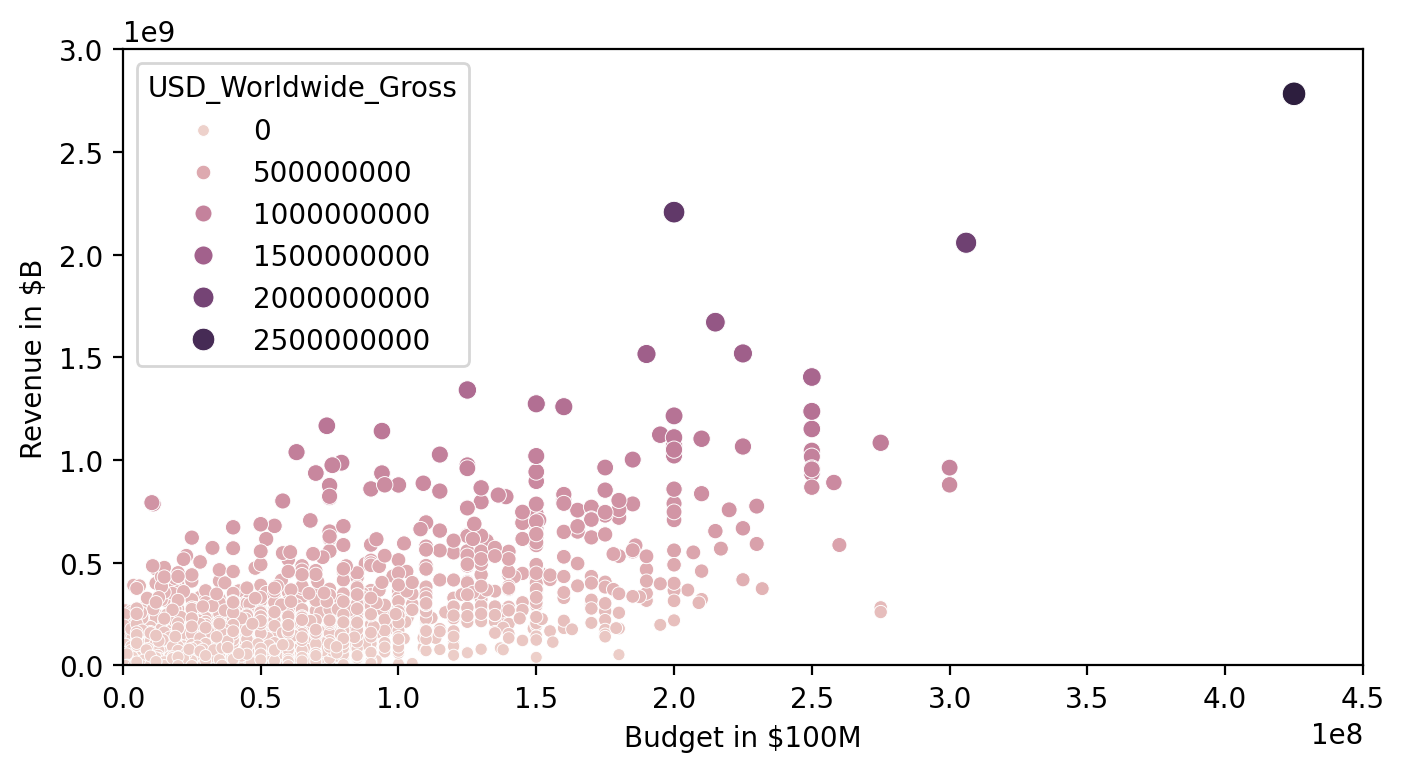

In [158]:
plt.figure(figsize=(8,4),
           dpi=200)

ax = sns.scatterplot(data=data_clean, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross',
                size='USD_Worldwide_Gross',
                )

# ax.set(ylim=(0, 3000000000),
#        xlim=(0, 4500000000),
#        ylabel = 'Revenue in $B',
#        xlabel = 'Budget in $100M'
#        )

ax.set(
        xlim=(0, 450000000),
        ylim=(0, 3000000000),
       ylabel = 'Revenue in $B',
       xlabel = 'Budget in $100M'
       )


plt.show()

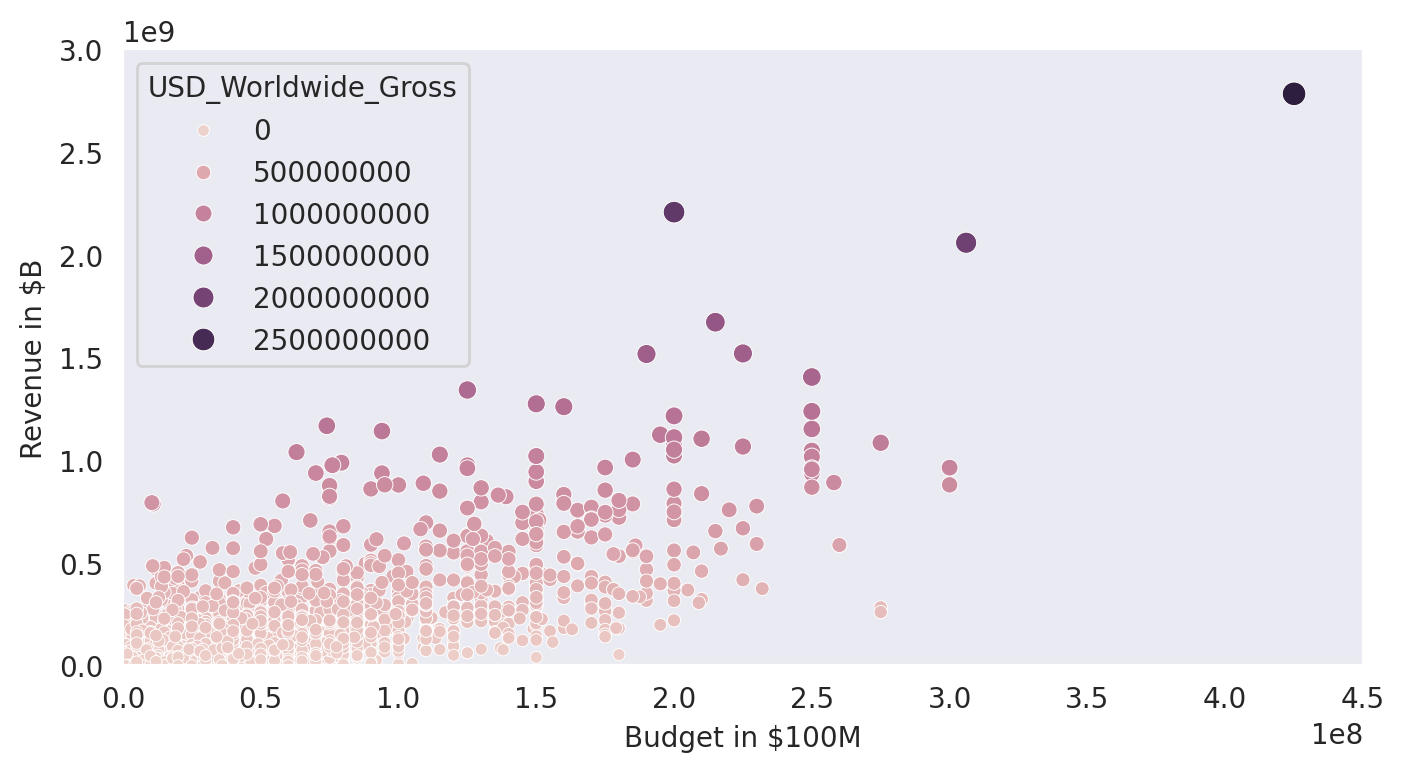

In [157]:
plt.figure(figsize=(8,4),
           dpi=200)


with sns.axes_style('dark'):
    ax = sns.scatterplot(data=data_clean, 
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',
                    )

    ax.set(
        xlim=(0, 450000000),
        ylim=(0, 3000000000),
        ylabel = 'Revenue in $B',
        xlabel = 'Budget in $100M'
        )


plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



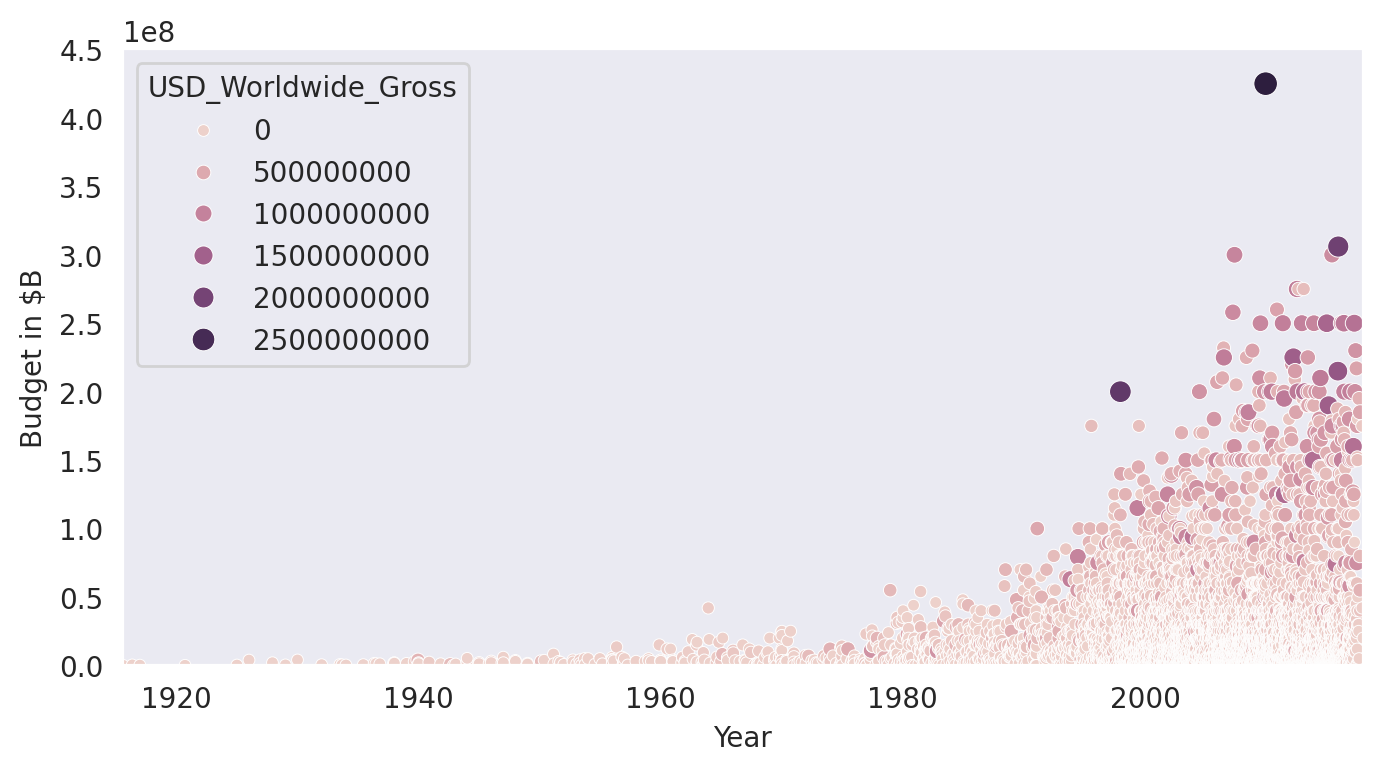

In [166]:
plt.figure(figsize=(8,4),
           dpi=200)


with sns.axes_style('dark'):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date',
                    y='USD_Production_Budget',
                    size='USD_Worldwide_Gross',
                    hue='USD_Worldwide_Gross',
                    )

    ax.set(
        xlabel = 'Year',
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),

        ylabel = 'Budget in $B',
        ylim=(0, 450000000),
        )


plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [176]:
years = pd.DatetimeIndex(data=data_clean.Release_Date).year
(years - 1900)//10 * 10
years

Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='Release_Date', length=5384)

In [186]:
dt_index = pd.DatetimeIndex(data=data_clean.Release_Date)
years = dt_index.year
years
decades = years // 10 * 10
data_clean['Decade'] = decades



In [184]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decacde
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [187]:
old_films = data_clean.query('Decade < 1970')
new_films = data_clean.query('Decade >= 1970')


In [190]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decacde,Decade
count,153.00,153,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00","1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72,12.72


In [191]:
new_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decacde,Decade
count,"5,231.00",5231,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00",2005-02-19 05:27:18.615943424,"31,811,437.73","90,683,497.56","41,841,922.35","2,000.19","2,000.19"
min,1.00,1970-01-01 00:00:00,"1,100.00",0.00,0.00,"1,970.00","1,970.00"
25%,"1,314.50",2000-07-14 00:00:00,"5,000,000.00","3,831,677.00","1,252,581.00","2,000.00","2,000.00"
50%,"2,629.00",2006-10-03 00:00:00,"18,000,000.00","28,544,120.00","17,510,118.00","2,000.00","2,000.00"
75%,"3,967.50",2012-01-06 00:00:00,"40,000,000.00","98,777,000.00","53,301,583.00","2,010.00","2,010.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,010.00","2,010.00"
std,"1,549.33",NaN,"40,758,580.67","170,424,978.36","66,702,734.68",9.58,9.58


In [199]:
old_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decacde,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920,1920


In [201]:
old_films[old_films.USD_Production_Budget==old_films.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decacde,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960,1960


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 